In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', sep='\s+', header=None)

In [ ]:
df.sample(4, random_state = 3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
224,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307.0,17.4,385.05,4.14,44.8
137,0.35233,0.0,21.89,0,0.624,6.454,98.4,1.8498,4,437.0,21.2,394.08,14.59,17.1
453,8.24809,0.0,18.10,0,0.713,7.393,99.3,2.4527,24,666.0,20.2,375.87,16.74,17.8
303,0.10000,34.0,6.09,0,0.433,6.982,17.7,5.4917,7,329.0,16.1,390.43,4.86,33.1


In [ ]:
cols_to_rename = {
    0:'CRIM',
    1:'ZN',
    2:'INDUS',
    3:'CHAS',
    4:'NOX',
    5:'RM',
    6:'AGE',
    7:'DIS',
    8:'RAD',
    9:'TAX',
    10:'PTRATIO',
    11:'B:1000',
    12:'LSTAT',
    13:'MEDV'
}

In [ ]:
df.rename(columns=cols_to_rename, inplace=True)
df.sample(4, random_state = 27)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B:1000,LSTAT,MEDV
427,37.66190,0.0,18.10,0,0.679,6.202,78.7,1.8629,24,666.0,20.2,18.82,14.52,10.9
260,0.54011,20.0,3.97,0,0.647,7.203,81.8,2.1121,5,264.0,13.0,392.80,9.59,33.8
115,0.17134,0.0,10.01,0,0.547,5.928,88.2,2.4631,6,432.0,17.8,344.91,15.76,18.3
398,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666.0,20.2,396.90,30.59,5.0


In [ ]:
#definir estilo de seaborn

sns.set(style="ticks", context='notebook')

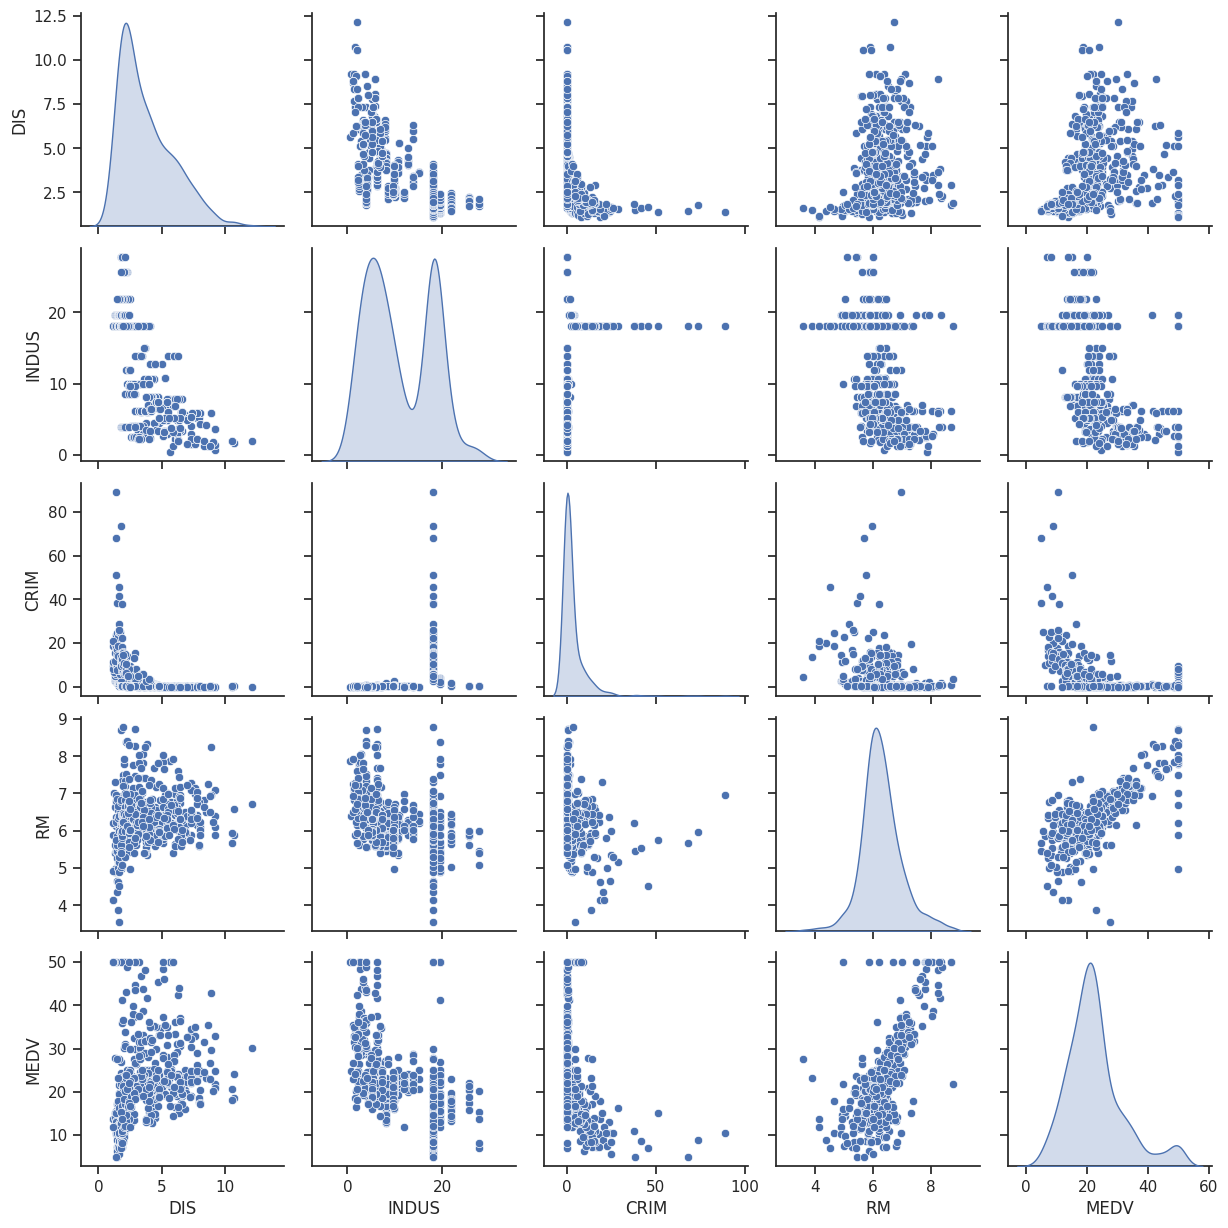

In [ ]:
# Crea el pairplot
cols_to_viz = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']

sns.pairplot(df[cols_to_viz], diag_kind='kde', markers='o')

# Mostrar el pairplot
plt.show()

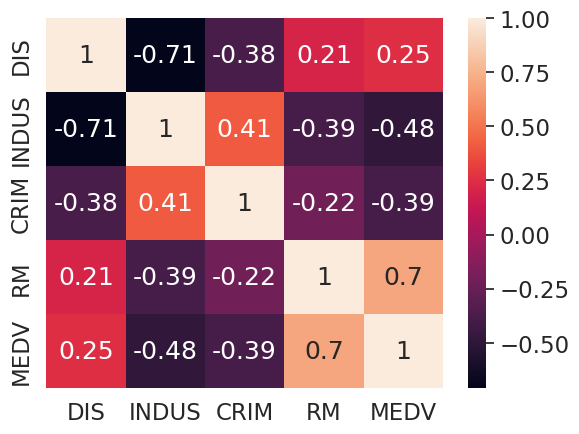

In [ ]:
# Calcula la matriz de correlación
cm = np.corrcoef(df[cols_to_viz], rowvar=False)

# Configura el estilo de la fuente en el mapa de calor
sns.set(font_scale=1.5)

# Crea un mapa de calor de la matriz de correlación
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols_to_viz, xticklabels=cols_to_viz)

# Muestra el mapa de calor
plt.show()

## Regresion lienal

In [ ]:
%pip install sklearn

  Using cached sklearn-0.0.post10.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2959 sha256=cc883d03264ac6b7eab795c8a79049d5703f364d9f86c186bddf30edacd05379
  Stored in directory: /root/.cache/pip/wheels/5b/f6/92/0173054cc528db7ffe7b0c7652a96c3102aab156a6da960387
Successfully built sklearn


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# divicion de datos en feature y target
X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

In [ ]:
# Escalamiento estandar
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [ ]:
slr = LinearRegression()
slr.fit(X, y)

LinearRegression()

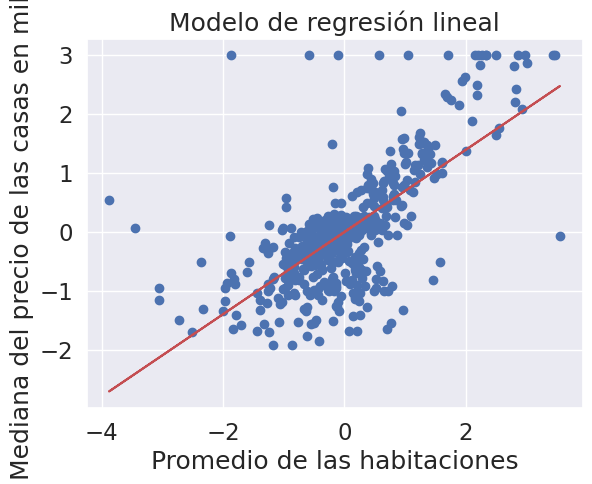

In [ ]:
# Crear una dispersión de puntos para los datos originales
plt.scatter(X, y)
plt.title('Modelo de regresión lineal')

# Agregar la línea de regresión
plt.plot(X, slr.predict(X), color='r')

# Establecer etiquetas de los ejes y el título
plt.ylabel('Mediana del precio de las casas en miles')
plt.xlabel('Promedio de las habitaciones')

# Mostrar el gráfico
plt.show()


In [ ]:
# Generando predicciones
# 5. Realizar predicciones en el conjunto de prueba
num_room = 5

num_room_std = scaler_X.transform(np.array(num_room).reshape(-1, 1))

y_pred = slr.predict(num_room_std)

y_pred_original = scaler_y.inverse_transform(y_pred)

In [ ]:
y_pred_original

array([[10.83992413]])

## Regresión lineal multivariable

In [96]:
# divicion de datos en feature y target
X = df[['RM', 'INDUS']].values
y = df['MEDV'].values.reshape(-1, 1)

In [97]:
# Escalamiento estandar
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [98]:
slr = LinearRegression()
slr.fit(X, y)

LinearRegression()

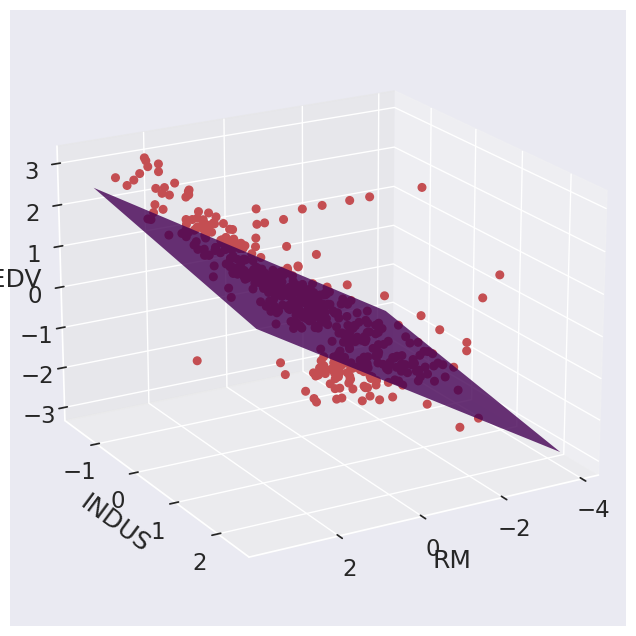

In [100]:
# Definir el espaciado deseado en la malla
spacing = 0.1

# Crear rangos x1 y x2 con el espaciado deseado
x1_range = np.arange(X[:, 0].min(), X[:, 0].max(), spacing)
x2_range = np.arange(X[:, 1].min(), X[:, 1].max(), spacing)

# Crear mallas x1 y x2 a partir de los rangos
x1, x2 = np.meshgrid(x1_range, x2_range)

# Realizar predicciones del modelo en la malla
pred = slr.predict(np.array([x1.flatten(), x2.flatten()]).T).reshape(x1.shape)

# Crear una figura 3D con un tamaño específico
fig = plt.figure(figsize=(10, 8))

# Agregar un subplot 3D a la figura
ax = fig.add_subplot(projection='3d')

# Dibujar la superficie de predicción con un mapa de colores agradables
ax.plot_surface(x1, x2, pred, cmap='viridis', alpha=0.8, rstride=100, cstride=100, linewidth=0)

# Dibujar puntos de datos reales en color rojo
ax.scatter3D(X[:, 0], X[:, 1], y, color='r', s=30, alpha=1)

# Configurar la vista del gráfico 3D para una mejor visualización
ax.view_init(elev=20, azim=60)

# Establecer etiquetas de ejes
ax.set_xlabel('RM')
ax.set_ylabel('INDUS')
ax.set_zlabel('MEDV')

# Mostrar el gráfico 3D
plt.show()
